In [1]:
import pandas as pd
import statistics
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import seaborn as sns
import numpy as np
from datetime import datetime

In [2]:
# Dataframing the csv file
df1 = pd.read_csv('Data/Global_Landslide_Catalog_Export.csv')

In [3]:
# reference table for referencies
df1.head(5)

,source_name,source_link,event_id,event_date,event_time,event_title,event_description,location_description,location_accuracy,landslide_category,...,country_code,admin_division_name,admin_division_population,gazeteer_closest_point,gazeteer_distance,submitted_date,created_date,last_edited_date,longitude,latitude
0,3 News,http://www.3news.co.nz/Kakapo-Maggie-dies-in-l...,6034,05/20/2014 12:00:00 AM,NaN,Codfish Island,A landslide on Codfish Island has killed Maggi...,Codfish Island,5km,landslide,...,NZ,Southland,1651.0,Riverton,55.60925,01/07/2015 08:02:00 PM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,167.6337,-46.7748
1,Otago Daily Times,http://www.odt.co.nz/news/dunedin/108264/lands...,1910,05/29/2010 06:45:00 AM,NaN,"Berwick Camp, Otago region","Elsewhere, a landslide slammed into a building...","Berwick Camp, Otago region",10km,landslide,...,NZ,Otago,2009.0,Milton,26.14437,01/08/2016 07:34:00 PM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,170.0982,-45.9034
2,Stuff.co,http://www.stuff.co.nz/national/69094695/priso...,6997,06/04/2015 12:00:00 AM,NaN,Highcliff Road,Police estimated five sections of Highcliff ro...,Highcliff Road,5km,landslide,...,NZ,Otago,1200.0,Portobello,3.45468,06/26/2015 08:32:00 PM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,170.6273,-45.8767
3,www.radionz.co.nz,http://www.radionz.co.nz/news/national/137785/...,4941,06/17/2013 12:00:00 AM,NaN,"Portobello Rd., Dunedin, Otago Peninsula","Two days of heavy rain shut down North Otago, ...","Portobello Rd., Dunedin, Otago Peninsula",5km,landslide,...,NZ,Otago,1200.0,Portobello,5.55301,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,170.5863,-45.8727
4,3 News,http://www.3news.co.nz/Landslide-crashes-into-...,6008,05/01/2014 04:00:00 AM,NaN,"Queen Street, Dunedin",Five students living in a Dunedin house had an...,"Queen Street, Dunedin",1km,landslide,...,NZ,Otago,114347.0,Dunedin,1.43901,08/24/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,170.5090,-45.8618


In [4]:
date_string = df1['submitted_date'].fillna(method = 'backfill')
years = []
for dates in date_string:
    if isinstance(dates, float):
        date = str(int(dates))
    date_object = datetime.strptime(dates, "%m/%d/%Y %H:%M:%S %p")
    year = date_object.year
    years.append(year)

I used a 'backfill' method to fill NaN values from the list, since the 1 year, or less difference will not make a big inffluence on the data as there aren't many values missing.

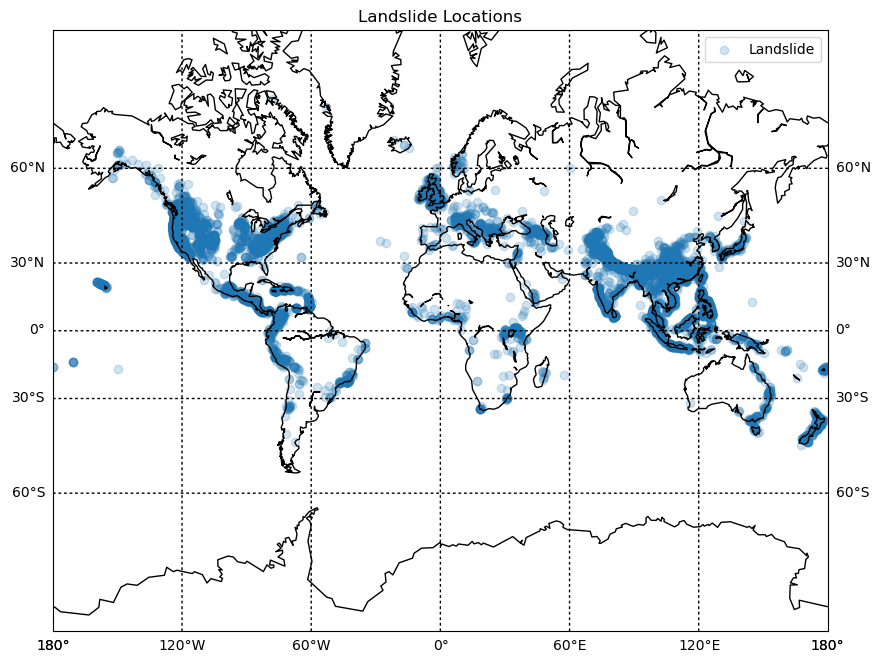

In [5]:
longitude = df1['longitude'].tolist()
latitude = df1['latitude'].tolist()

#changing the figure size
plt.figure(figsize = (10, 8))

# creatinga basemap
m = Basemap(projection = 'merc', llcrnrlat = -80, urcrnrlat = 80, llcrnrlon = -180, urcrnrlon = 180, resolution = 'c')
m.drawcoastlines()

# ploting the points
plt.title('Landslide Locations')
m.drawparallels(np.arange(-90, 91, 30), labels = [True, True, False, False], dashes = [2, 2])
m.drawmeridians(np.arange(-180, 181, 60), labels = [False, False, False, True], dashes = [2, 2])
x, y = m(longitude, latitude)
m.scatter(x, y, alpha = 0.2, label = 'Landslide')
plt.legend(loc = 0)
plt.show()

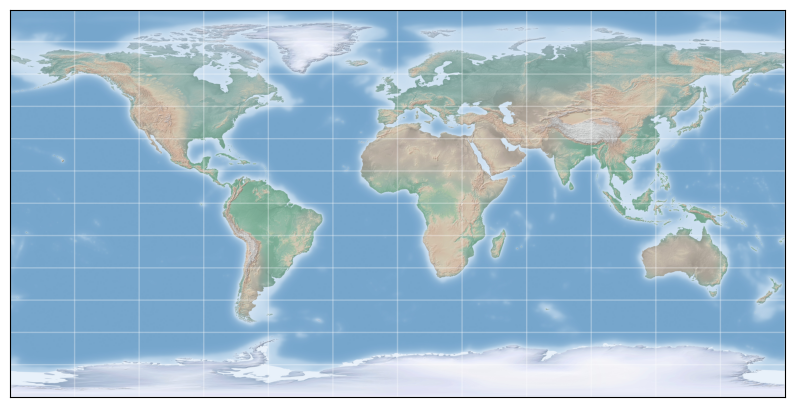

In [11]:
from itertools import chain

def draw_map(m, scale=0.2):
    # draw a shaded-relief image
    m.shadedrelief(scale=scale)
    
    # lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))

    # keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    # cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')

fig = plt.figure(figsize=(10, 8), edgecolor='w')
m2 = Basemap(projection='cyl', resolution='c',
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, )
draw_map(m2)

This can be compared with the landslide markers above to have a look at mountainous regions and how the inclination of the terrain can affect the number of landslides. This is valid to coastal cities too.

In [7]:
# creating a dataframe
df_facet = pd.DataFrame({
    'latitude' : df1['latitude'],
    'longitude' : df1['longitude'],
    'years' : years
})

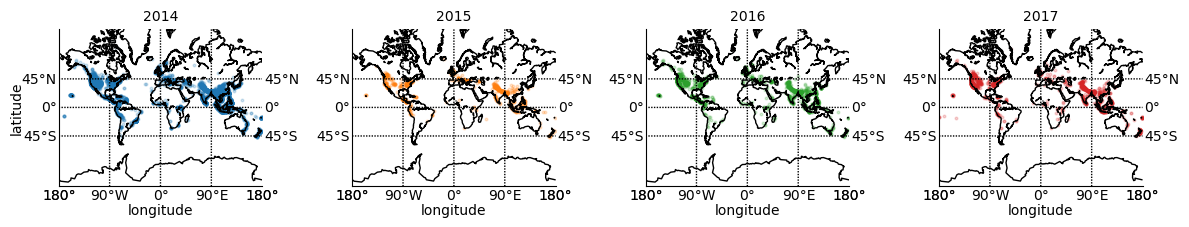

In [33]:
# Create a grid : initialize it
g = sns.FacetGrid(df_facet, col = 'years', hue = 'years', col_wrap=4)

# defining the function to plot
def plot_basemap(x, y, **kwargs):
    ax = plt.gca()
    
    # Add the basemap
    m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180, resolution='c', ax=ax)
    m.drawcoastlines()
    
    # Converting the latitude and longitude to coordinates
    lon, lat = m(x, y)
    
    # scatter plot
    ax.scatter(lon, lat, s = 3.5, alpha=0.2, **kwargs)
    
    # Draw parallels and meridians
    m.drawparallels(np.arange(-90, 91, 45), labels = [True, True, False, False], dashes = [1, 1])
    m.drawmeridians(np.arange(-180, 181, 90), labels = [False, False, False, True], dashes = [1, 1])
    
    # Changing the label distance from the axis
    plt.xlabel('Longitude', labelpad = 12)
    plt.ylabel('Latitude', labelpad = 25)
    
# Add the line over the area with the plot function
g = g.map(plot_basemap, 'longitude', 'latitude')

# Control the title of each facet
g = g.set_titles("{col_name}")

# Show the graph
plt.show()